In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [72]:
nfl_data = pd.read_csv('datacleaning.csv',low_memory=False)
np.random.seed(0) 
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [73]:
print("DataFrame size: ", nfl_data.shape)
nfl_data.info()

DataFrame size:  (362447, 102)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [75]:
nfl_data.isnull().any()

Date        False
GameID      False
Drive       False
qtr         False
down         True
            ...  
Win_Prob     True
WPA          True
airWPA       True
yacWPA       True
Season      False
Length: 102, dtype: bool

In [76]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

In [77]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.85847694188906


In [78]:
# So far this dataset contains a lot of data. Let's trim it down to
# the Steelers stats from last season which is 2016
Steelers = nfl_data[((nfl_data["HomeTeam"] == 'PIT') | (nfl_data["AwayTeam"] == 'PIT')) 
             & (nfl_data["Season"] == 2016) & (nfl_data['Touchdown'] == 1)]
grouped = Steelers.groupby(by='Date')
len(grouped)

16

In [79]:
# Now that we have all the Steelers data let's look at all the offensive plays
offense = Steelers[(Steelers["DefensiveTeam"] != 'PIT')]

# We are going to sort it by yards gained including the top 100 plays
Top_Plays = offense.sort_values(by='Yards.Gained',ascending=False)[:48]

# Now let's make sure we can see both rushers and recievers
Top_Plays['scorer'] = Top_Plays["Rusher"]
Top_Plays['scorer'].fillna(Top_Plays['Receiver'], inplace = True)

# Let's look at what we have
Touchdowns = Top_Plays[['PlayType',
          'down',
          'Yards.Gained',
          'Date',
          'qtr',
          'desc',
          'scorer',
          'Rusher',
          'Receiver']]
Touchdowns.head()

,PlayType,down,Yards.Gained,Date,qtr,desc,scorer,Rusher,Receiver
329328,Pass,3.0,72,2016-10-09,1,(10:25) (Shotgun) B.Roethlisberger pass deep r...,S.Coates,NaN,S.Coates
332020,Run,1.0,60,2016-10-16,1,"(5:52) D.Heyward-Bey left end for 60 yards, TO...",D.Heyward-Bey,D.Heyward-Bey,NaN
327736,Pass,2.0,38,2016-10-02,1,(1:28) B.Roethlisberger pass deep middle to A....,A.Brown,NaN,A.Brown
346084,Pass,2.0,33,2016-11-24,2,(9:08) (Pass formation) B.Roethlisberger pass ...,A.Brown,NaN,A.Brown
327717,Pass,3.0,31,2016-10-02,1,(7:34) (Shotgun) B.Roethlisberger pass deep le...,D.Heyward-Bey,NaN,D.Heyward-Bey


In [80]:
Touchdowns.shape
Touchdowns.dtypes

PlayType         object
down            float64
Yards.Gained      int64
Date             object
qtr               int64
desc             object
scorer           object
Rusher           object
Receiver         object
dtype: object

In [81]:
Touchdowns.describe()

,down,Yards.Gained,qtr
count,48.000000,48.000000,48.000000
mean,2.145833,15.041667,2.729167
std,0.922291,14.996394,1.283936
min,1.000000,0.000000,1.000000
25%,1.000000,4.000000,1.750000
50%,2.000000,10.000000,3.000000
75%,3.000000,23.000000,4.000000
max,4.000000,72.000000,5.000000


1 Remove data

In [82]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [83]:
print("Dữ liệu trùng: ", nfl_data.duplicated().sum())
print("Dữ liệu bị mất: ", nfl_data.isnull().sum().sum())

Dữ liệu trùng:  0
Dữ liệu bị mất:  9190078


In [84]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [85]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


2- Filling in missing values automatically

In [86]:
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [87]:
# replace all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [88]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [90]:
print(Top_Plays.head())

              Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
329328  2016-10-09  2016100906      2    1   3.0  10:25         11    3325.0   
332020  2016-10-16  2016101603      3    1   1.0  05:52          6    3052.0   
327736  2016-10-02  2016100212      8    1   2.0  01:28          2    2788.0   
346084  2016-11-24  2016112402      6    2   2.0  09:08         10    2348.0   
327717  2016-10-02  2016100212      4    1   3.0  07:34          8    3154.0   

        PlayTimeDiff SideofField  ...  Home_WP_pre  Away_WP_pre  Home_WP_post  \
329328          45.0         PIT  ...     0.384999     0.615001      0.610825   
332020          23.0         PIT  ...     0.526015     0.473985      0.382228   
327736          39.0          KC  ...     0.933839     0.066161      0.973400   
346084          42.0         IND  ...     0.182968     0.817032      0.119181   
327717          39.0          KC  ...     0.579184     0.420816      0.719982   

        Away_WP_post  Win_Prob  

General Data Visualization

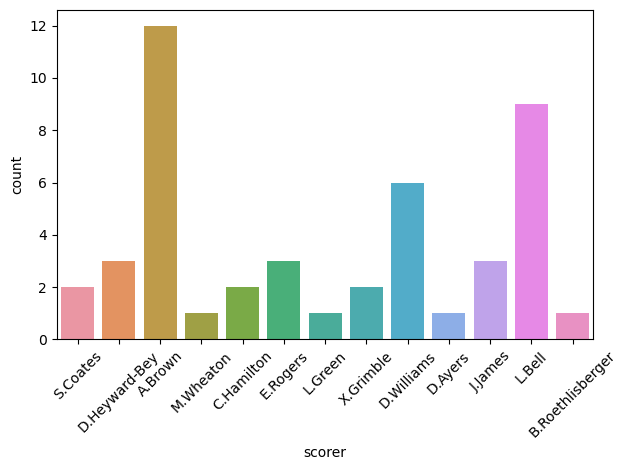

In [96]:
# Vẽ biểu đồ countplot cho cột "scorer"
sns.countplot(data=Top_Plays, x='scorer')

# Xoay nhãn trục x để làm cho chúng dễ đọc hơn
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<Axes: xlabel='PlayType', ylabel='count'>

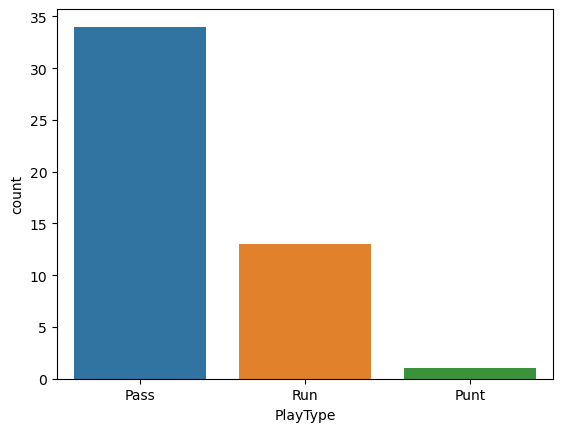

In [92]:
sns.countplot(x="PlayType", data=Top_Plays)

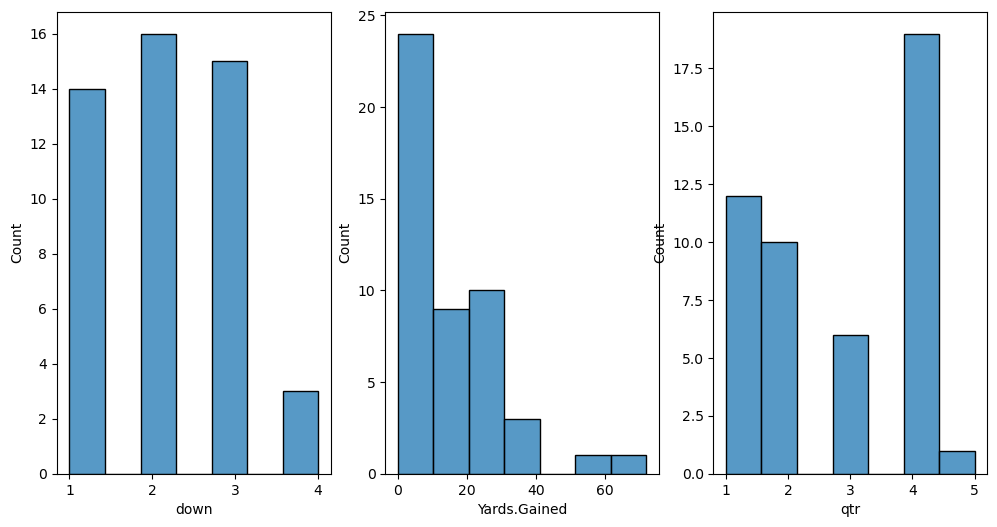

<Figure size 640x480 with 0 Axes>

In [94]:
fig, axs = plt.subplots(ncols = 3, figsize=(12,6))
sns.histplot(Top_Plays["down"], ax=axs[0])
sns.histplot(Top_Plays["Yards.Gained"], ax=axs[1])
sns.histplot(Top_Plays["qtr"], ax=axs[2])

# Hiển thị biểu đồ
plt.show()
plt.tight_layout()
plt.show()

<Axes: xlabel='Rusher', ylabel='count'>

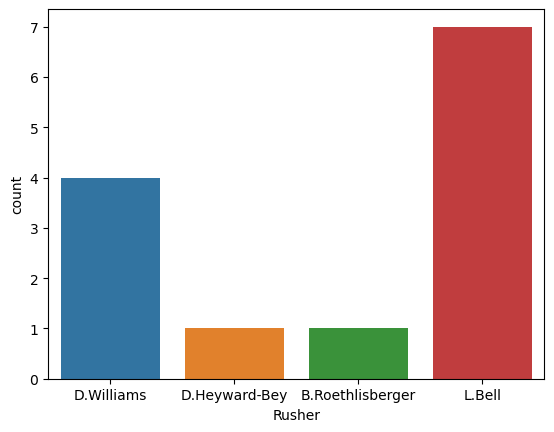

In [69]:
runs = offense[(offense["PlayType"] == 'Run')]
sns.countplot(x="Rusher",data=runs)

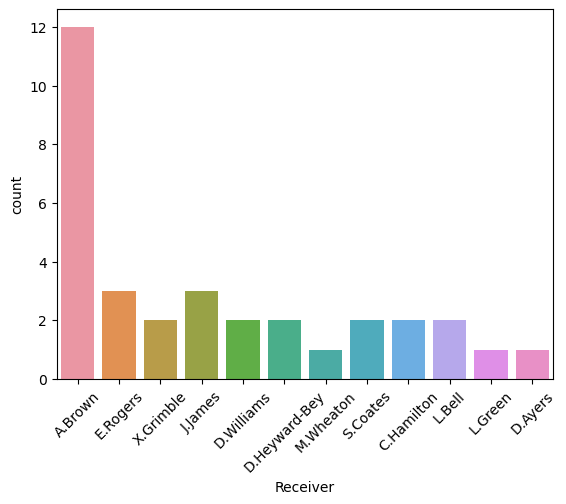

In [70]:
# Next we will look at Receivers:
passes = offense[(offense["PlayType"] == 'Pass')]
x = sns.countplot(x="Receiver",data=passes)
plt.setp(x.get_xticklabels(), rotation=45)
plt.show()